# Text Generation NLP Model

Here is a text generation NLP model that is trained on a collection of Shakespearian poems called "The Sonnets". The text is generated by an LSTM network that learns both English and the underlying patterns of Shakespeare's style. You can start the poem and it will finish it.

<table>
<td>
<img src="deep_learing_class/images/shakespeare.jpg" style="width:250;height:300px;">

</td>

</table>

In [1]:
# import libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# load the Shakespeare text & convert it to lower case
data = open('data/shakespear.txt', 'r').read()
data= data.lower()
# review the data
chars = sorted(list(set(data)))
print("Here is list of unique characters: \n" + str(chars))
n_chars, n_vocab = len(data), len(chars)
print("Total characters: ", n_chars)
print("Total vocabulary: ", n_vocab)

Here is list of unique characters: 
['\n', ' ', '!', "'", '(', ')', ',', '-', '.', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Total characters:  94249
Total vocabulary:  38


In [3]:
# create python dictionaries mapping chars-to-integers and integers-to-chars
char_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_char = { i:ch for i,ch in enumerate(chars) }
print(char_to_int)
print("-----------")
print(int_to_char)

{'\n': 0, ' ': 1, '!': 2, "'": 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, ':': 9, ';': 10, '?': 11, 'a': 12, 'b': 13, 'c': 14, 'd': 15, 'e': 16, 'f': 17, 'g': 18, 'h': 19, 'i': 20, 'j': 21, 'k': 22, 'l': 23, 'm': 24, 'n': 25, 'o': 26, 'p': 27, 'q': 28, 'r': 29, 's': 30, 't': 31, 'u': 32, 'v': 33, 'w': 34, 'x': 35, 'y': 36, 'z': 37}
-----------
{0: '\n', 1: ' ', 2: '!', 3: "'", 4: '(', 5: ')', 6: ',', 7: '-', 8: '.', 9: ':', 10: ';', 11: '?', 12: 'a', 13: 'b', 14: 'c', 15: 'd', 16: 'e', 17: 'f', 18: 'g', 19: 'h', 20: 'i', 21: 'j', 22: 'k', 23: 'l', 24: 'm', 25: 'n', 26: 'o', 27: 'p', 28: 'q', 29: 'r', 30: 's', 31: 't', 32: 'u', 33: 'v', 34: 'w', 35: 'x', 36: 'y', 37: 'z'}


In [4]:
# determine average line length
lines = data.splitlines()
sentences = []
for i in range(len(lines)):
    if len(lines[i]) > 0:
        sentences.append(lines[i])
print("Number of sentences:", len(sentences))
result = [len(x) for x in sentences]
print("Sentence mean length", np.mean(result))

Number of sentences: 2176
Sentence mean length 42.18014705882353


In [5]:
# transform the dataset into a supervised learning set of input to output pairs encoded as integers
max_length = 42
step = 2
dataX = []
dataY = []
for i in range(0, n_chars - max_length, step):
    seq_in = data[i:i + max_length]
    seq_out = data[i + max_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  47104


In [6]:
# reshape input for LSTM [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, max_length, 1))
print("Input shape:", X.shape)
# normalize the data
X = X / float(n_vocab)
# one-hot encode the output variable
y = np_utils.to_categorical(dataY)
print("Output shape:", y.shape)

Input shape: (47104, 42, 1)
Output shape: (47104, 38)


In [7]:
# define the LSTM model
def lstm_model(X, y):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(256, return_sequences=True)(inputs)
    D1 = Dropout(0.2)(L1)
    L2 = LSTM(256, return_sequences=False)(D1)
    D2 = Dropout(0.2)(L2)  
    output = Dense(y.shape[1], activation='softmax')(D2)
    model = Model(inputs=inputs, outputs=output)
    return model    

In [8]:
# create the LSTM model
model = lstm_model(X, y)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 42, 1)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 42, 256)           264192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 42, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 38)                9766      
Total params: 799,270
Trainable params: 799,270
Non-trainable params: 0
_________________________________________________________________


In [9]:
# fit the model
nb_epochs = 500
history = model.fit(X, y, epochs=nb_epochs, batch_size=64, shuffle=True).history

Epoch 1/500
47104/47104 [==============================] - 250s 5ms/step - loss: 2.9235 - acc: 0.1858
Epoch 2/500
47104/47104 [==============================] - 202s 4ms/step - loss: 2.6663 - acc: 0.2439
Epoch 3/500
47104/47104 [==============================] - 201s 4ms/step - loss: 2.5430 - acc: 0.2709
Epoch 4/500
47104/47104 [==============================] - 193s 4ms/step - loss: 2.4637 - acc: 0.2856
Epoch 5/500
47104/47104 [==============================] - 192s 4ms/step - loss: 2.3949 - acc: 0.3030
Epoch 6/500
47104/47104 [==============================] - 192s 4ms/step - loss: 2.3282 - acc: 0.3183
Epoch 7/500
47104/47104 [==============================] - 216s 5ms/step - loss: 2.2699 - acc: 0.3336
Epoch 8/500
47104/47104 [==============================] - 262s 6ms/step - loss: 2.2147 - acc: 0.3465
Epoch 9/500
47104/47104 [==============================] - 232s 5ms/step - loss: 2.1634 - acc: 0.3632
Epoch 10/500
47104/47104 [==============================] - 202s 4ms/step - loss: 

47104/47104 [==============================] - 256s 5ms/step - loss: 0.9177 - acc: 0.7005
Epoch 81/500
47104/47104 [==============================] - 256s 5ms/step - loss: 0.9042 - acc: 0.7058
Epoch 82/500
47104/47104 [==============================] - 255s 5ms/step - loss: 0.9073 - acc: 0.7050
Epoch 83/500
47104/47104 [==============================] - 258s 5ms/step - loss: 0.9013 - acc: 0.7064
Epoch 84/500
47104/47104 [==============================] - 266s 6ms/step - loss: 0.8994 - acc: 0.7077
Epoch 85/500
47104/47104 [==============================] - 259s 5ms/step - loss: 0.8955 - acc: 0.7064
Epoch 86/500
47104/47104 [==============================] - 257s 5ms/step - loss: 0.8834 - acc: 0.7119
Epoch 87/500
47104/47104 [==============================] - 258s 5ms/step - loss: 0.8818 - acc: 0.7116
Epoch 88/500
47104/47104 [==============================] - 258s 5ms/step - loss: 0.8900 - acc: 0.7084
Epoch 89/500
47104/47104 [==============================] - 257s 5ms/step - loss: 0.87

47104/47104 [==============================] - 264s 6ms/step - loss: 0.7759 - acc: 0.7415
Epoch 160/500
47104/47104 [==============================] - 264s 6ms/step - loss: 0.7793 - acc: 0.7411
Epoch 161/500
47104/47104 [==============================] - 264s 6ms/step - loss: 0.7603 - acc: 0.7486
Epoch 162/500
47104/47104 [==============================] - 275s 6ms/step - loss: 0.7664 - acc: 0.7461
Epoch 163/500
47104/47104 [==============================] - 264s 6ms/step - loss: 0.7860 - acc: 0.7383
Epoch 164/500
47104/47104 [==============================] - 259s 6ms/step - loss: 0.7708 - acc: 0.7424
Epoch 165/500
47104/47104 [==============================] - 258s 5ms/step - loss: 0.7746 - acc: 0.7420
Epoch 166/500
47104/47104 [==============================] - 257s 5ms/step - loss: 0.7690 - acc: 0.7441
Epoch 167/500
47104/47104 [==============================] - 259s 5ms/step - loss: 0.7822 - acc: 0.7418
Epoch 168/500
47104/47104 [==============================] - 256s 5ms/step - l

47104/47104 [==============================] - 268s 6ms/step - loss: 0.7332 - acc: 0.7557
Epoch 238/500
47104/47104 [==============================] - 268s 6ms/step - loss: 0.7268 - acc: 0.7565
Epoch 239/500
47104/47104 [==============================] - 269s 6ms/step - loss: 0.7041 - acc: 0.7652
Epoch 240/500
47104/47104 [==============================] - 269s 6ms/step - loss: 0.7247 - acc: 0.7579
Epoch 241/500
47104/47104 [==============================] - 269s 6ms/step - loss: 0.7322 - acc: 0.7551
Epoch 242/500
47104/47104 [==============================] - 264s 6ms/step - loss: 0.7373 - acc: 0.7551
Epoch 243/500
47104/47104 [==============================] - 262s 6ms/step - loss: 0.7210 - acc: 0.7599
Epoch 244/500
47104/47104 [==============================] - 262s 6ms/step - loss: 0.7154 - acc: 0.7616
Epoch 245/500
47104/47104 [==============================] - 262s 6ms/step - loss: 0.7068 - acc: 0.7636
Epoch 246/500
47104/47104 [==============================] - 261s 6ms/step - l

47104/47104 [==============================] - 262s 6ms/step - loss: 0.6598 - acc: 0.7786
Epoch 316/500
47104/47104 [==============================] - 263s 6ms/step - loss: 0.6593 - acc: 0.7784
Epoch 317/500
47104/47104 [==============================] - 263s 6ms/step - loss: 0.6792 - acc: 0.7719
Epoch 318/500
47104/47104 [==============================] - 262s 6ms/step - loss: 0.6724 - acc: 0.7753
Epoch 319/500
47104/47104 [==============================] - 262s 6ms/step - loss: 0.6659 - acc: 0.7769
Epoch 320/500
47104/47104 [==============================] - 262s 6ms/step - loss: 0.6729 - acc: 0.7748
Epoch 321/500
47104/47104 [==============================] - 262s 6ms/step - loss: 0.6876 - acc: 0.7721
Epoch 322/500
47104/47104 [==============================] - 262s 6ms/step - loss: 0.6744 - acc: 0.7749
Epoch 323/500
47104/47104 [==============================] - 263s 6ms/step - loss: 0.6675 - acc: 0.7759
Epoch 324/500
47104/47104 [==============================] - 261s 6ms/step - l

47104/47104 [==============================] - 266s 6ms/step - loss: 0.6144 - acc: 0.7940
Epoch 394/500
47104/47104 [==============================] - 266s 6ms/step - loss: 0.6177 - acc: 0.7936
Epoch 395/500
47104/47104 [==============================] - 264s 6ms/step - loss: 0.6133 - acc: 0.7938
Epoch 396/500
47104/47104 [==============================] - 265s 6ms/step - loss: 0.6072 - acc: 0.7936
Epoch 397/500
47104/47104 [==============================] - 267s 6ms/step - loss: 0.6142 - acc: 0.7925
Epoch 398/500
47104/47104 [==============================] - 261s 6ms/step - loss: 0.6072 - acc: 0.7934
Epoch 399/500
47104/47104 [==============================] - 260s 6ms/step - loss: 0.6120 - acc: 0.7931
Epoch 400/500
47104/47104 [==============================] - 259s 5ms/step - loss: 0.6169 - acc: 0.7918
Epoch 401/500
47104/47104 [==============================] - 260s 6ms/step - loss: 0.6289 - acc: 0.7882
Epoch 402/500
47104/47104 [==============================] - 259s 5ms/step - l

47104/47104 [==============================] - 222s 5ms/step - loss: 0.5913 - acc: 0.8009
Epoch 472/500
47104/47104 [==============================] - 207s 4ms/step - loss: 0.5908 - acc: 0.8003
Epoch 473/500
47104/47104 [==============================] - 216s 5ms/step - loss: 0.5866 - acc: 0.8024
Epoch 474/500
47104/47104 [==============================] - 214s 5ms/step - loss: 0.5733 - acc: 0.8062
Epoch 475/500
47104/47104 [==============================] - 235s 5ms/step - loss: 0.5848 - acc: 0.8022
Epoch 476/500
47104/47104 [==============================] - 231s 5ms/step - loss: 0.5796 - acc: 0.8020
Epoch 477/500
47104/47104 [==============================] - 223s 5ms/step - loss: 0.5739 - acc: 0.8100
Epoch 478/500
47104/47104 [==============================] - 296s 6ms/step - loss: 0.5888 - acc: 0.8028
Epoch 479/500
47104/47104 [==============================] - 316s 7ms/step - loss: 0.5781 - acc: 0.8058
Epoch 480/500
47104/47104 [==============================] - 316s 7ms/step - l

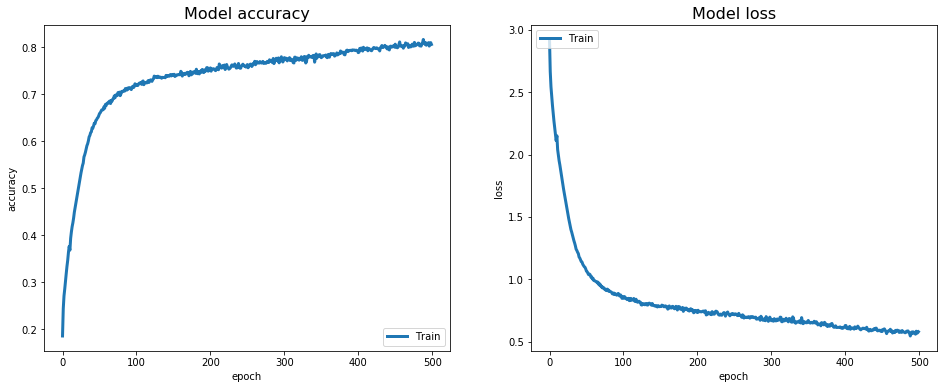

In [10]:
# plot the model loss and accuracy
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# summarize history for accuracy
axis1.plot(history['acc'], label='Train', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='lower right')

# summarize history for loss
axis2.plot(history['loss'], label='Train', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper left')
plt.show()

In [21]:
# enter a starting sequence for your poem
user_input = input("Write the beginning of your poem, the Shakespeare machine will complete it. \n")

Write the beginning of your poem, the Shakespeare machine will complete it. 
While walking on the river Nye


In [22]:
# generate characters
user_input = user_input.lower()
print(user_input)
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]

for i in range(1200):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]

while walking on the river nye
and your tweet beauty ssill worle soace,
oi mine own srnre,soose,
and that hs not five peeeepede wourh,
and thou af wes boti dompradt thay woe,
and live ooee ges filders,
bnd thoughts the sueet leases that thou shall gare drtented face,
s eresi where thou mayst pays i tene i llf,
that thou art braysesy mine thmiui heart to sueetls gave:
the couald ceed the loves twaie the clrttacl of the vornd and clay,
farh paie my love stat fair,
these blassed oe thy hood thoughts, what thou miehtsy st thou should forming hours,
fuen sic better part of mine eye sieht speae,
where thall h laykng of your giarnen eoees,
oo mf the semnose of the world despiss,
comning thy braint bnd doth meed geav,
and prou becrty do inher in me,
lor when shes blans beeo wes i love you seale shou presartelcee
of alote,
then look did fxclcnee as iin ien he ragn,
and brisher thy srngues shat peptre shou art the lake,
that thou mo heart the buiu, of that there be gair dishr ly self drau,
for t